# List of Keywords we would be interested in (general): 
### (Note that it is impossible to know every subcategory we should expect)
1. Paper
2. Plastic
3. Glass
4. Cardboard
5. Metal
6. Electronic
7. Trash

## Misc....

In [1]:
import tensorflow as tf
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.3,
        zoom_range=0.4,
        rotation_range=90,
        horizontal_flip=True,
        #preprocessing_function = preprocess_image
)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)#, preprocessing_function = preprocess_image)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './data/train',  # this is the target directory
       # target_size=(100, 100),  # all images will be resized to 100x100
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need categorical labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        './data/valid',
        #target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical')

# this is a similar generator, for validation data
test_generator = test_datagen.flow_from_directory(
        './data/test',
        #target_size=(100, 100),
        batch_size=batch_size, 
        class_mode='categorical')

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def padding(image):
    height = image.shape[0]
    width = image.shape[1]

    left_pad, right_pad, top_pad, bottom_pad = 0, 0, 0, 0
    if height > width:
        left_pad = int((height-width) / 2)
        right_pad = height-width-left_pad
    elif width > height:
        top_pad = int((width-height) / 2)
        bottom_pad = width-height-top_pad

    img_square = cv.copyMakeBorder(
        image,
        top_pad,
        bottom_pad,
        left_pad,
        right_pad,
        cv.BORDER_CONSTANT,
        value=(255,255,255)
    )
    return img_square

def toGray(image):
    # toGray converts RGB values to grayscale values by forming a weighted sum of the R, G, and B components:
    # 0.2989 * R + 0.5870 * G + 0.1140 * B 
    # source: https://www.mathworks.com/help/matlab/ref/rgb2gray.html
    image[:,:,0] = 0.2989*image[:,:,0] +  0.5870*image[:,:,1] + 0.1140*image[:,:,2]
    image[:,:,1] = 0.2989*image[:,:,0] +  0.5870*image[:,:,1] + 0.1140*image[:,:,2]
    image[:,:,2] = 0.2989*image[:,:,0] +  0.5870*image[:,:,1] + 0.1140*image[:,:,2]
    return image

def preprocess_image(image):
    #image =toGray(image)
    image = padding(image)
    image_scaled = cv.resize(image, (300, 300))
    #image_scaled = np.true_divide(image_scaled, 255.0)
    #print(image_scaled.shape)
    return image_scaled

In [ ]:
file = 'dataset-original/paper/paper297.jpg'
image = cv.imread(file)
height = image.shape[0]
width = image.shape[1]

left_pad, right_pad, top_pad, bottom_pad = 0, 0, 0, 0
if height > width:
    left_pad = int((height-width) / 2)
    right_pad = height-width-left_pad
elif width > height:
    top_pad = int((width-height) / 2)
    bottom_pad = width-height-top_pad

img_square = cv.copyMakeBorder(
    image,
    top_pad,
    bottom_pad,
    left_pad,
    right_pad,
    cv.BORDER_CONSTANT,
    value=(255,255,255)
)
print(img_square.shape[0], img_square.shape[1])
new = padding(image)

In [ ]:
!pip install opencv-python==3.4.2.17 numpy==1.14.5

In [ ]:
import os, sys
import glob
import cv2 as cv
root_dir = "./dataset-original/"
count = 0
total = 2527
for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    count += 1
    print(count,'/',total)
    im = cv.imread(filename)
    pad1 = padding(im)
    new = preprocess_image(im)
    cv.imwrite(filename, new)

In [ ]:
# paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid', 'test']
waste_types = ['cardboard', 'glass', 'metal','paper', 'plastic', 'trash']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
# if not os.path.exists(os.path.join('data1','test')):
#     os.makedirs(os.path.join('data1','test'))
            
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('dataset-original',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    try:
        ## move source files to train
        train_names = get_names(waste_type,train_ind)
        train_source_files = [os.path.join(source_folder,name) for name in train_names]
        train_dest = "data/train/"+waste_type
        move_files(train_source_files,train_dest)

        ## move source files to valid
        valid_names = get_names(waste_type,valid_ind)
        valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
        valid_dest = "data/valid/"+waste_type
        move_files(valid_source_files,valid_dest)

        ## move source files to test
        test_names = get_names(waste_type,test_ind)
        test_source_files = [os.path.join(source_folder,name) for name in test_names]
        ## I use data/test here because the images can be mixed up
        test_dest = "data/test/"+waste_type
        move_files(test_source_files,test_dest)
    except:
        print('error')
        pass

## Now let's try to use the trashnet model and only use images with the complete object
#### https://nbviewer.jupyter.org/github/collindching/Waste-Sorter/blob/master/Waste%20sorter.ipynb

# 1. Extract Data from Bucket

In [ ]:
!gsutil -q cp -r gs://original-data-amli/dataset-original .

In [ ]:
!gsutil -q cp -r gs://original-data-amli/dataset-resized .

In [ ]:
!gsutil -q cp -r gs://original-data-amli/AMLI-trashnet/ .

In [ ]:
!gsutil -q cp -r gs://original-data-amli/AMLI-trashnet\ 2/ .

In [ ]:
!gsutil ls gs://original-data-amli/

# 2. Imports and Organize images into different folders

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [3]:
# Your code goes here
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import cv2 as cv
import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#Use attached zip file (splits data into train, validation, and testing)

In [ ]:
os.listdir(os.path.join(os.getcwd(),"dataset-resized"))


In [ ]:
#Lets add some of e-waste into training, validation, and testing (but only 80% of total e-waste in total dataset)
import math
folder = os.path.join('AMLI-trashnet 2/E-Waste/Photo/')
n = len(os.listdir(folder))
source_file = "AMLI-trashnet 2/E-Waste/Photo/"
i = 1
train,valid,test = split_indices(folder, 1,1)
#Take 20% of each off
train_length = math.floor(len(train)*.8)
train = train[:train_length]
valid_length = math.floor(len(valid)*.8)
valid = valid[:valid_length]
test_length = math.floor(len(test)*.8)
test = test[:test_length]

l = [train, valid, test]


# train_dest = "data/train/"+waste_type
# move_files(train_source_files,train_dest)
    
# for file in source_file:
#     print(file)
#     i+= 1
#     shutil.copy(file,destination_folder)

In [ ]:
train

In [ ]:
#train.remove(253)
# train.remove(221)
train_names = get_names('E-Waste', train)
train_source_files = [os.path.join(source_folder,name) for name in train_names]
train_dest = "data/train/E-Waste"
for file in train_source_files:
    x = file.split('/')[3]
#     print(train_dest, '\n',x)
    my_file = Path(os.path.join(train_dest, x))
#     print(my_file)
    if my_file.exists():
        pass
    else:
        shutil.move(file,train_dest)

In [ ]:
#train.remove(253)
#valid.remove(207)
valid_names = get_names('E-Waste', valid)
valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
valid_dest = "data/valid/E-Waste"
for file in valid_source_files:
    x = file.split('/')[3]
#     print(train_dest, '\n',x)
    my_file = Path(os.path.join(valid_dest, x))
#     print(my_file)
    if my_file.exists():
        pass
    else:
        shutil.move(file,valid_dest)

In [ ]:
#test.remove(211)
test_names = get_names('E-Waste', test)
test_source_files = [os.path.join(source_folder,name) for name in test_names]
test_dest = "data/test/E-Waste"
for file in test_source_files:
    x = file.split('/')[3]
#     print(train_dest, '\n',x)
    my_file = Path(os.path.join(test_dest, x))
#     print(my_file)
    if my_file.exists():
        pass
    else:
        shutil.move(file,test_dest)

In [ ]:
## helper functions ##
import random
import shutil
## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.copy(file,destination_folder)

In [29]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid', 'test']
waste_types = ['cardboard','glass','metal','paper','plastic','trash', 'E-Waste']

In [ ]:

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('dataset-resized',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    test_dest = "data/test/"+waste_type
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files,test_dest)

In [4]:
## get a path to the folder with images
path = Path(os.getcwd())/"data"
path


PosixPath('/home/jupyter/Recycling/data')

In [12]:
tfms = get_transforms(do_flip=True)#,#flip_vert=True) - NOT ADDING FLIP_VERT = TRUE BECAUSE OF E-WASTE IMAGES
# resize with size = tuple w/ resize method
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16, size = (384,512))

In [ ]:
data

In [ ]:
print(data.classes)

In [ ]:
data.show_batch(rows=4,figsize=(10,8))

# 3. Model Training

In [6]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

/opt/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.model

## 3.1 Find the ideal learning rate

In [ ]:
learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()

## 3.2 Training

In [11]:
learn.fit_one_cycle(16,max_lr=5.13e-03)


epoch,train_loss,valid_loss,error_rate,time
0,0.868800,0.533940,0.162930,00:45
1,0.637995,0.436361,0.128550,00:44
2,0.615069,0.582832,0.203288,00:44
3,0.641212,0.552288,0.165919,00:44
4,0.623836,0.612631,0.189836,00:43
5,0.630657,0.457208,0.153961,00:44
6,0.519371,0.514431,0.189836,00:44
7,0.486303,0.360505,0.128550,00:43
8,0.372423,0.338468,0.110613,00:44
9,0.371379,0.342041,0.106129,00:43


## 3.3 VIsualizing most incorrect images¶

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

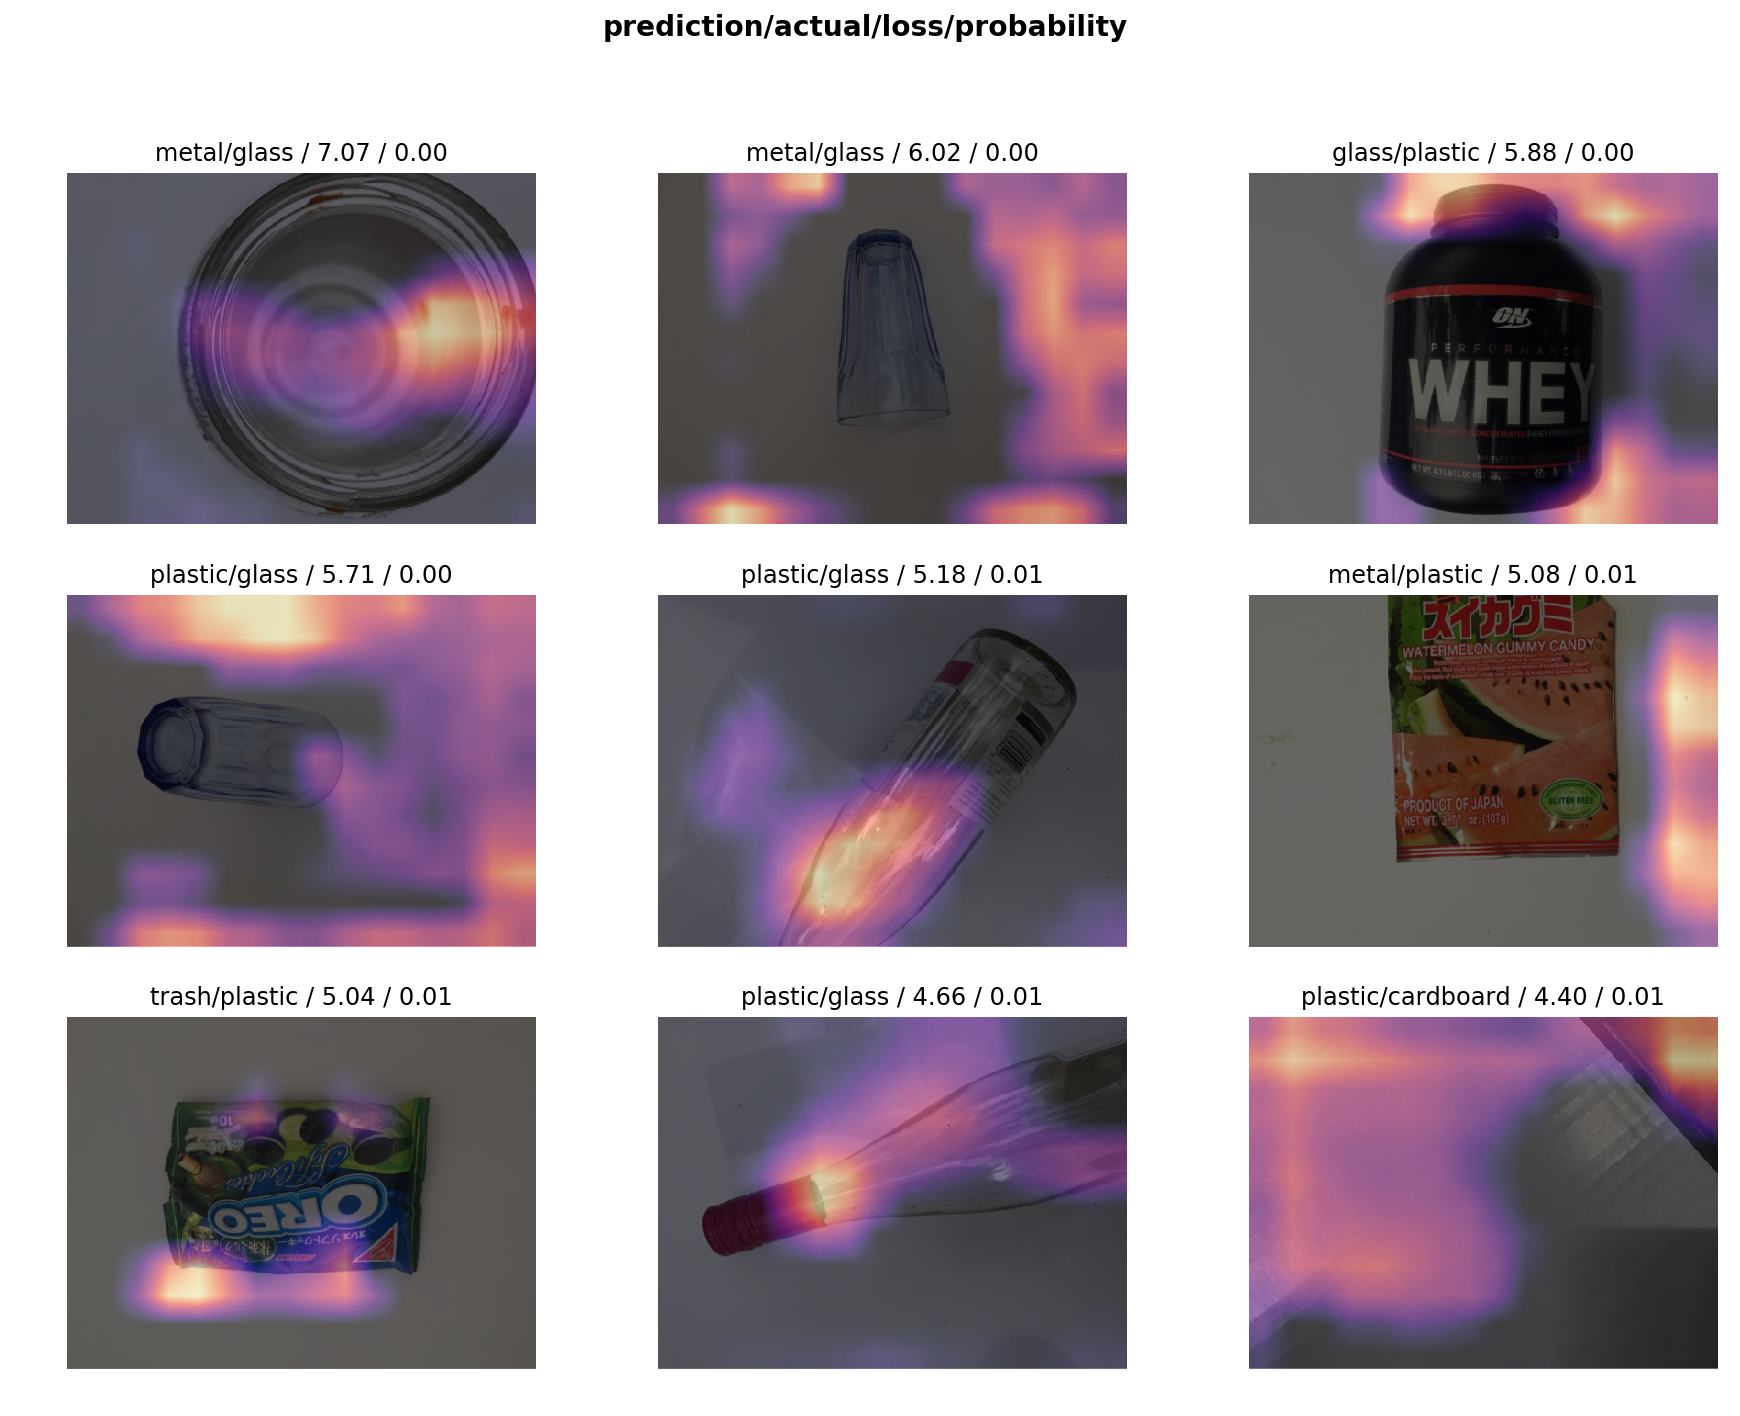

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

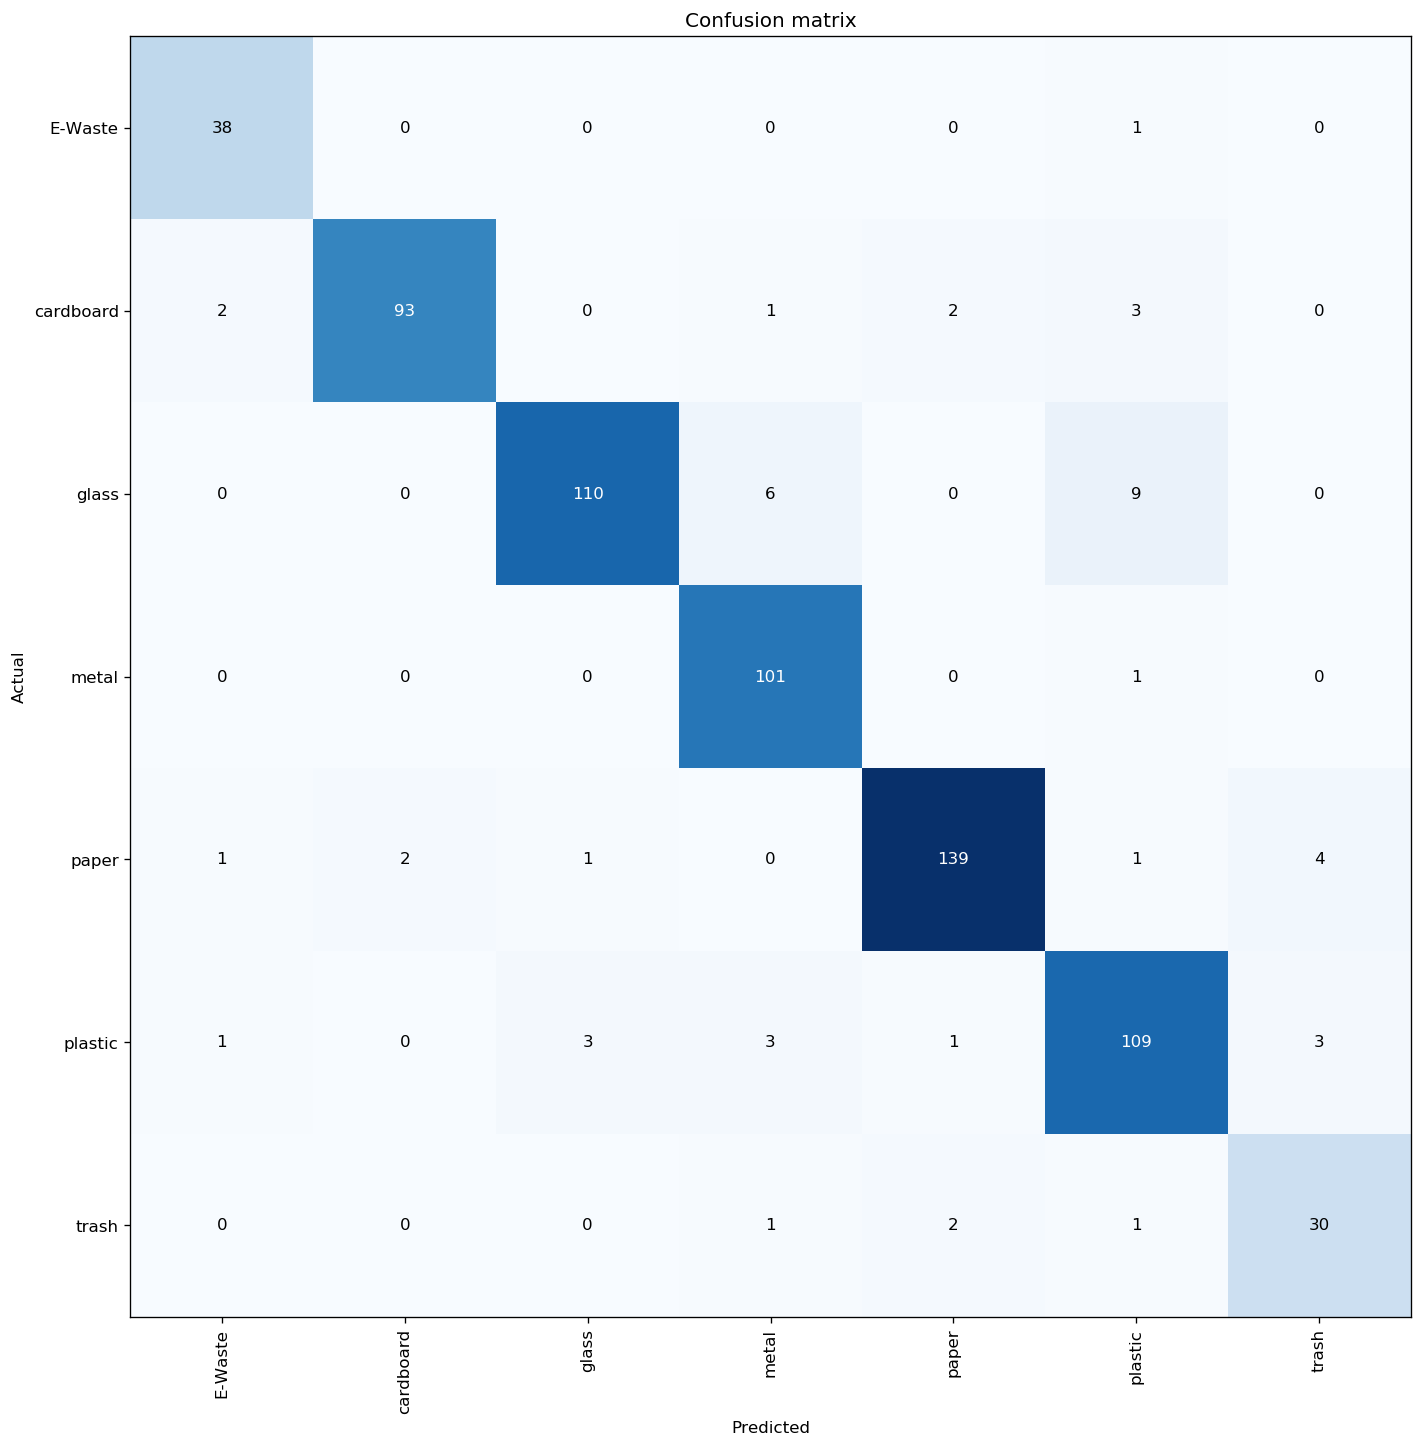

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = None , heatmap_thresh : int = 16 , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

In [15]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=2)

[('glass', 'plastic', 9),
 ('glass', 'metal', 6),
 ('paper', 'trash', 4),
 ('cardboard', 'plastic', 3),
 ('plastic', 'glass', 3),
 ('plastic', 'metal', 3),
 ('plastic', 'trash', 3),
 ('cardboard', 'E-Waste', 2),
 ('cardboard', 'paper', 2),
 ('paper', 'cardboard', 2),
 ('trash', 'paper', 2)]

## 3.4 Make new predictions on test data

In [17]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [18]:
print(preds[0].shape)
preds[0]

torch.Size([678, 7])


tensor([[1.3631e-01, 1.8683e-01, 1.5131e-04,  ..., 4.3578e-01, 1.3615e-02,
         2.2693e-01],
        [2.6541e-05, 7.4094e-03, 2.8725e-07,  ..., 9.9138e-01, 5.1641e-06,
         1.1259e-03],
        [7.1610e-06, 2.1372e-05, 1.3491e-06,  ..., 9.9983e-01, 1.1745e-04,
         1.0507e-05],
        ...,
        [8.6577e-06, 5.1073e-06, 9.8448e-01,  ..., 7.4853e-06, 1.5237e-02,
         2.5714e-04],
        [2.0198e-03, 1.2612e-04, 5.4559e-01,  ..., 1.7711e-03, 1.5643e-01,
         3.8149e-04],
        [1.0124e-04, 7.7672e-05, 9.8760e-01,  ..., 1.1053e-06, 6.0716e-04,
         2.2867e-05]])

In [19]:
data.classes

['E-Waste', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [20]:
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [21]:
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

In [22]:
yhat[:5]

['paper', 'paper', 'paper', 'paper', 'paper']

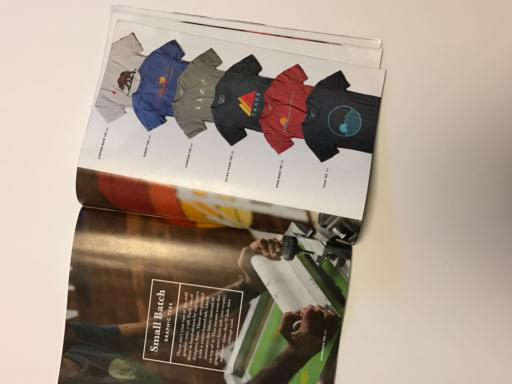

In [23]:
learn.data.test_ds[0][0]

In [24]:
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
        
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [25]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])

['paper', 'paper', 'paper', 'paper', 'paper']
['paper', 'paper', 'paper', 'paper', 'paper']


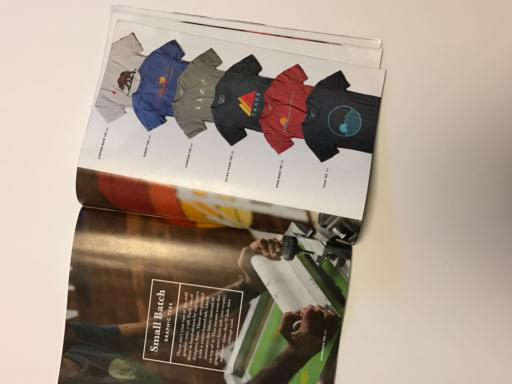

In [26]:
learn.data.test_ds[0][0]

In [27]:
cm = confusion_matrix(y,yhat)
print(cm)

[[  0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0]
 [  1   0  94   1   3   2   0   0]
 [  0   0   1 105   9   0  11   0]
 [  0   0   0   3  97   1   2   0]
 [  1   0   0   0   1 144   1   2]
 [  0   0   0   2   2   1 112   4]
 [  0   0   1   0   1   1   1  31]]


In [30]:
df_cm = pd.DataFrame(cm,waste_types,waste_types)

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

ValueError: Shape of passed values is (8, 8), indices imply (7, 7)

In [31]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [32]:
accuracy = correct/sum(sum(cm))
accuracy

0.859882005899705

In [ ]:
# ## delete everything when you're done to save space
# shutil.rmtree("data")
# shutil.rmtree('dataset-resized')

## 1.5 AMLI-trashnet Preprocessing

### Photos only first (Ignore Video folders)
Note that:
dataset-resized: includes images from the original trashnet
data: includes train,test,valid from dataset-resized
AMLI-trashnet: includes images before e-waste
new_data: includes train,test,valid from AMLI-trashnet


In [ ]:
def rename(waste): 
    i = 0
    file = os.path.join('AMLI-trashnet 2/', waste, 'Photo')
    for filename in os.listdir(file): 
        dst = waste + str(i) + ".jpg"
        src =file+'/'+ filename 
        dst =file+ '/' + dst 
        os.rename(src, dst) 
        i += 1
rename('E-Waste')

In [ ]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid', 'test']
waste_types = ['Cardboard','Glass','Metal','Paper','Plastic','Trash', 'E-Waste']

for waste in waste_types:
    rename(waste)

In [ ]:
## helper functions ##
import random
import shutil
## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(0,n))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(0,n)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.copy(file,destination_folder)

In [ ]:
## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('new_data 2',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
for waste_type in waste_types:
    source_folder = os.path.join('AMLI-trashnet 2',waste_type, 'Photo')
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    print(waste_type)
    print('train', train_ind)
    print('val', valid_ind)
    print('test', test_ind,'\n')

In [ ]:
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('AMLI-trashnet 2',waste_type, 'Photo')
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "new_data 2/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "new_data 2/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    test_dest = "new_data 2/test/"+waste_type
    move_files(test_source_files,test_dest)

In [ ]:
## get a path to the folder with images
path = Path(os.getcwd())/"new_data"
path

In [ ]:
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,train_pct = .5,bs=16, no_check=True)
data.classes.append('Trash')

In [ ]:
data.classes

In [ ]:
learn.data = data

In [ ]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
print(preds.shape)

In [ ]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))
print(max_idxs[7])

In [ ]:
yhat = []
for max_idx in max_idxs:
    print(max_idx)
    print(data.classes[max_idx])
    yhat.append(data.classes[max_idx])

In [ ]:
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [ ]:
cm = confusion_matrix(y,yhat)
print(cm)

In [ ]:
learn.data.test_ds[0][0]

In [ ]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [ ]:
accuracy = correct/sum(sum(cm))
accuracy

In [ ]:
data.classes